In [555]:
import pandas as pd
import plotly as plt
import plotly.express as px
import sklearn as sc
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import plotly.graph_objects as go

## Diákok teljesítményének becslése

hivatkozás: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?select=StudentPerformanceFactors.csv

In [556]:
df = pd.read_csv("data/StudentPerformanceFactors.csv", header=0)
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [557]:
df[["Hours_Studied", "Attendance", "Motivation_Level", "Gender"]].head()

,Hours_Studied,Attendance,Motivation_Level,Gender
0,23,84,Low,Male
1,19,64,Low,Female
2,24,98,Medium,Male
3,29,89,Medium,Male
4,19,92,Medium,Female


In [558]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


## Adatfeltárás

A lineáris (pearson) és a monoton (spearman) korrelációk kirajzolása adatfeltárás céljából.

In [559]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

In [560]:
# Identify columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

# Encode categorical columns
df_encoded = df.copy()
df_encoded = df[numerical_cols]
# encoder = OrdinalEncoder()
# df_encoded[categorical_cols] = encoder.fit_transform(df_encoded[categorical_cols])

# Normalize numeric columns
# scaler = StandardScaler()
# df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
# df_encoded = df

# Compute correlation matrices
# pearson_corr = df_encoded.corr(method='pearson')
spearman_corr = df_encoded.corr(method='spearman')

# Function to plot correlation matrix
def plot_correlation_matrix(corr_matrix, title):
    fig = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        colorbar=dict(title="Correlation")
    ))

    for i in range(len(corr_matrix)):
        for j in range(len(corr_matrix.columns)):
            fig.add_annotation(
                x=corr_matrix.columns[j],
                y=corr_matrix.index[i],
                text=f"{corr_matrix.iloc[i, j]:.2f}",
                showarrow=False,
                font=dict(size=18, color="black")  # Bigger font size
            )

    fig.update_layout(
        title=title,
        xaxis_title="Features",
        yaxis_title="Features",
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        xaxis=dict(scaleanchor='y', ticks=''),  # Square aspect
        yaxis=dict(ticks=''),
        margin=dict(l=80, r=80, t=100, b=80),
        width=1200,
        height=1200,
        font=dict(size=24)  # Larger overall font
    )

    fig.show()

# Plot both matrices
# plot_correlation_matrix(pearson_corr, "Pearson Correlation Matrix")
plot_correlation_matrix(spearman_corr, "Spearman Correlation Matrix")

## Lineáris regresszió használata a várható vizsgaeredmények becslésére

In [561]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

In [562]:
df = pd.read_csv("data/StudentPerformanceFactors.csv")

In [563]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [564]:
df_scaled = df.copy()

scaler = StandardScaler()
features = numerical_cols.drop('Exam_Score')  # exclude target from predictors
X = df_scaled[features]
y = df_scaled['Exam_Score']

In [565]:
X = scaler.fit_transform(X)

In [566]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [567]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [568]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [569]:
feature_importance = pd.Series(model.coef_, index=features).sort_values(ascending=False)

In [570]:
# Output results
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print("\nFeature Importance:")
print(feature_importance)

R² Score: 0.642
Mean Squared Error: 5.065

Feature Importance:
Attendance           2.293932
Hours_Studied        1.732763
Previous_Scores      0.694174
Tutoring_Sessions    0.627378
Physical_Activity    0.155811
Sleep_Hours         -0.049207
dtype: float64


In [571]:
model.intercept_

np.float64(67.23534320551069)

In [572]:
model.coef_

array([ 1.73276276,  2.29393233, -0.04920665,  0.69417406,  0.62737833,
        0.15581097])

### Órai részvétel vs vizsgaeredmények

In [573]:
attendance_range = np.linspace(df['Attendance'].min(), df['Attendance'].max(), 100)

# leskálázás
attendance_range_standard = (attendance_range - attendance_range.mean()) / attendance_range.std()

y_pred_line = attendance_range_standard * feature_importance['Attendance'] + model.intercept_

In [574]:
trace1 = go.Scatter(
    mode='markers',
    marker=dict(size=12, opacity=0.7),
    hovertext=[f"Attendance: {att:.2f}<br>Exam Score: {score:.2f}" for att, score in zip(df['Attendance'], df['Exam_Score'])],
    name='Adatok',
    x=df['Attendance'],
    y=df['Exam_Score'],
    zorder=1,
    )

trace2 = go.Scatter(
    x=attendance_range,
    y=y_pred_line,
    mode='lines',
    line=dict(color='red', width=4),  # Increase line width
    hovertext=[f"Predicted Score: {score:.2f}" for score in y_pred_line],
    name='Illesztett egyenes',
    zorder=999
)

layout=go.Layout(
    title='Órai részvétel és vizsgaeredmény',
    title_x=0.5,
    xaxis=dict(title='Órai Részvétel (%)'),
    yaxis=dict(title='Vizsgaeredmény (%)'),
    showlegend=True,
    hovermode='closest',
    margin=dict(l=80, r=80, t=100, b=80),
    font=dict(size=20)
)
fig = go.Figure(data=[trace1, trace2])

# Add the line after the scatter to ensure it draws on top


fig.update_layout(layout)
fig.update_layout(
    showlegend=False,
    width=800,
    height=800,
    font=dict(size=24),
    paper_bgcolor='rgba(0, 0, 0, 0)'
)

fig.show()

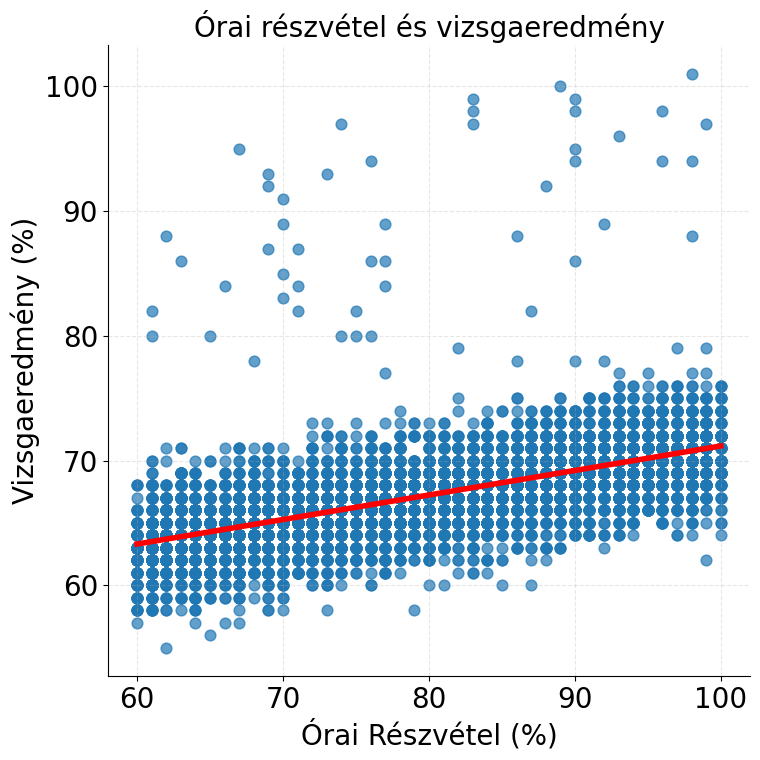

In [575]:
import matplotlib.pyplot as plt

# Set font size globally
plt.rcParams.update({'font.size': 20})

# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))  # 800x800 pixels approximately

# Scatter plot
ax.scatter(
    df['Attendance'],
    df['Exam_Score'],
    s=60,             # point size (12² in Plotly ≈ 120 here)
    alpha=0.7,         # transparency
    label='Adatok'
)

# Regression line
ax.plot(
    attendance_range,
    y_pred_line,
    color='red',
    linewidth=4,
    label='Illesztett egyenes'
)

# Labels and title
ax.set_title('Órai részvétel és vizsgaeredmény', fontsize=20, loc='center')
ax.set_xlabel('Órai Részvétel (%)')
ax.set_ylabel('Vizsgaeredmény (%)')

# Remove top/right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.grid(True, linestyle='--', alpha=0.3)

# Optional: no legend if not needed
# ax.legend()
plt.gcf().patch.set_alpha(0.0)
# Show plot
plt.tight_layout()
# plt.savefig('linear_regression_plot.png', transparent=True)

plt.show()


### Tanulással töltött órák vs vizsgaeredmények

In [576]:
hours_studied_range = np.linspace(df['Hours_Studied'].min(), df['Hours_Studied'].max(), 100)

# leskálázás
hours_studied_range_standard = (hours_studied_range - hours_studied_range.mean()) / hours_studied_range.std()

y_pred_line = hours_studied_range_standard * feature_importance['Hours_Studied'] + model.intercept_


In [577]:
fig = px.scatter(
    df,
    x='Hours_Studied',
    y='Exam_Score',
    title='Scatter Plot: Hours_Studied vs Exam Score with Regression Line',
    labels={
        'Hours_Studied': 'Hours_Studied',
        'Exam_Score': 'Exam Score'
    }
)

fig.add_trace(go.Scatter(
    x=hours_studied_range,
    y=y_pred_line,
    mode='lines',
    line=dict(color='red'),
    hovertext=[f"Predicted Score: {score:.2f}" for score in y_pred_line]
))

fig.update_layout(showlegend=False,
        width=600,
        height=600,)
fig.show()

### Alvás vs. vizsgaeredmények (kevésbé befolyásoló jellemző)

In [578]:
sleep_range = np.linspace(df['Sleep_Hours'].min(), df['Sleep_Hours'].max(), 100)

# leskálázás
sleep_range_standard = (sleep_range - sleep_range.mean()) / sleep_range.std()

y_pred_line = sleep_range_standard * feature_importance['Sleep_Hours'] + model.intercept_

In [579]:
fig = px.scatter(
    df,
    x='Sleep_Hours',
    y='Exam_Score',
    title='Scatter Plot: Sleep_Hours vs Exam Score with Regression Line',
    labels={
        'Hours_Studied': 'Sleep_Hours',
        'Exam_Score': 'Exam Score'
    }
)

fig.add_trace(go.Scatter(
    x=sleep_range,
    y=y_pred_line,
    mode='lines',
    line=dict(color='red'),
    hovertext=[f"Predicted Score: {score:.2f}" for score in y_pred_line]
))

fig.update_layout(showlegend=False,
        width=600,
        height=600,)
fig.show()

### Most skálázás nélkül

In [580]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

In [581]:
df_copy = df.copy()
df_copy = df_copy[numerical_cols]

In [582]:
features = numerical_cols.drop('Exam_Score')
X = df_copy[features]
y = df_encoded['Exam_Score']

In [583]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [584]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [585]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [586]:
feature_importance = pd.Series(model.coef_, index=features).sort_values(ascending=False)

In [587]:
print(f"R² Score: {r2:.3f}")
print(f"Mean Squared Error: {mse:.3f}")
print("\nFeature Importance:")
print(feature_importance)

R² Score: 0.642
Mean Squared Error: 5.065

Feature Importance:
Tutoring_Sessions    0.509866
Hours_Studied        0.289269
Attendance           0.198667
Physical_Activity    0.151104
Previous_Scores      0.048211
Sleep_Hours         -0.033519
dtype: float64


## Converting to Classification Problem: Pass/Fail Prediction

Let's convert the continuous Exam_Score into a binary classification problem where:
- Pass: Exam_Score ≥ 75
- Fail: Exam_Score < 75

We'll use logistic regression to predict whether a student will pass or fail based on hours studied.

Class distribution:
Pass_Fail
1    5155
0    1452
Name: count, dtype: int64
Pass rate: 78.02%

Logistic Regression Coefficients:
Intercept: -1.9124
Hours_Studied coefficient: 0.1710

Accuracy: 0.7867

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.16      0.24       275
           1       0.81      0.95      0.88      1047

    accuracy                           0.79      1322
   macro avg       0.64      0.56      0.56      1322
weighted avg       0.74      0.79      0.74      1322



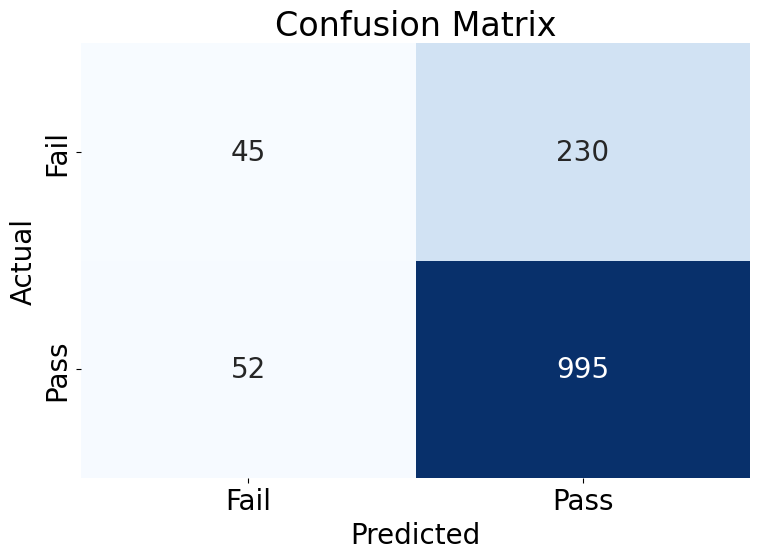

In [588]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Create binary target variable (1 for Pass, 0 for Fail)
df['Pass_Fail'] = (df['Exam_Score'] >= 65).astype(int)

# Look at class distribution
print("Class distribution:")
print(df['Pass_Fail'].value_counts())
print(f"Pass rate: {df['Pass_Fail'].mean():.2%}")

# Create X and y for logistic regression
X_hours = df[['Hours_Studied']]
y_pass_fail = df['Pass_Fail']

# Split the data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_hours, y_pass_fail, test_size=0.2, random_state=42
)

# Fit logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = log_reg.predict(X_test_lr)
y_prob_lr = log_reg.predict_proba(X_test_lr)[:,1]

# Print the coefficients
print(f"\nLogistic Regression Coefficients:")
print(f"Intercept: {log_reg.intercept_[0]:.4f}")
print(f"Hours_Studied coefficient: {log_reg.coef_[0][0]:.4f}")

# Evaluate the model
print(f"\nAccuracy: {accuracy_score(y_test_lr, y_pred_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_lr, y_pred_lr))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_lr, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
           xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

### Visualizing the Logistic Regression Model

Let's visualize the relationship between hours studied and the probability of passing the exam.

/tmp/ipykernel_15922/2958217160.py:8: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/tmp/ipykernel_15922/2958217160.py:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored

/home/mimre/miniconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names

/tmp/ipykernel_15922/2958217160.py:20: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "g-" (-> color='g'). The keyword argument will take precedence.



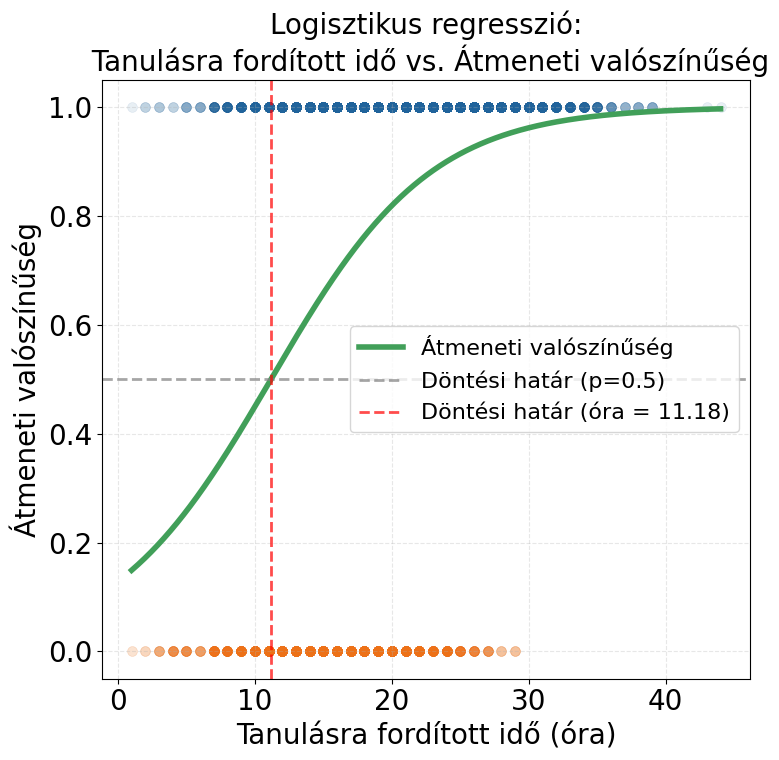

In [589]:
# Create a scatter plot of hours studied vs pass/fail status
plt.figure(figsize=(8, 8), facecolor='none')

cluster_colors = ['#ed7117', '#20639b']
highlight_color = '#419f59'

# Scatter plot for actual data
plt.scatter(df['Hours_Studied'][df['Pass_Fail'] == 0], df['Pass_Fail'][df['Pass_Fail'] == 0], c=cluster_colors[0],
           cmap='coolwarm', s=50, alpha=0.1, linewidth=0.5)
plt.scatter(df['Hours_Studied'][df['Pass_Fail'] == 1], df['Pass_Fail'][df['Pass_Fail'] == 1], c=cluster_colors[1],
           cmap='coolwarm', s=50, alpha=0.1, linewidth=0.5)

# Create a range of hours studied values for the sigmoid curve
hours_range = np.linspace(df['Hours_Studied'].min(), df['Hours_Studied'].max(), 1000).reshape(-1, 1)

# Calculate the predicted probabilities for each value in hours_range
pass_probs = log_reg.predict_proba(hours_range)[:,1]

# Plot the sigmoid curve
plt.plot(hours_range, pass_probs, 'g-', linewidth=4, label='Átmeneti valószínűség', color=highlight_color)

# Add a horizontal line at probability = 0.5
plt.axhline(y=0.5, color='gray', linestyle='--', linewidth=2, alpha=0.7, label='Döntési határ (p=0.5)')

# Find the decision boundary (where probability = 0.5)
decision_boundary = -log_reg.intercept_[0] / log_reg.coef_[0][0]
plt.axvline(x=decision_boundary, color='red', linestyle='--', linewidth=2, alpha=0.7,
           label=f'Döntési határ (óra = {decision_boundary:.2f})')

# Add labels and title
plt.xlabel('Tanulásra fordított idő (óra)', fontsize=20)
plt.ylabel('Átmeneti valószínűség', fontsize=20)
plt.title('Logisztikus regresszió:\n Tanulásra fordított idő vs. Átmeneti valószínűség', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.3)
plt.legend(loc='center right', fontsize=16)

# Set the axes and figure background to transparent
plt.gca()
plt.gcf().patch.set_alpha(0.0)

# Add text with model details
equation = f"log(p/(1-p)) = {log_reg.intercept_[0]:.2f} + {log_reg.coef_[0][0]:.2f} × Tanulásra fordított idő (óra)"
accuracy = accuracy_score(y_test_lr, y_pred_lr)

plt.tight_layout()
# plt.savefig('logistic_regression_plot.png', transparent=True)
plt.show()

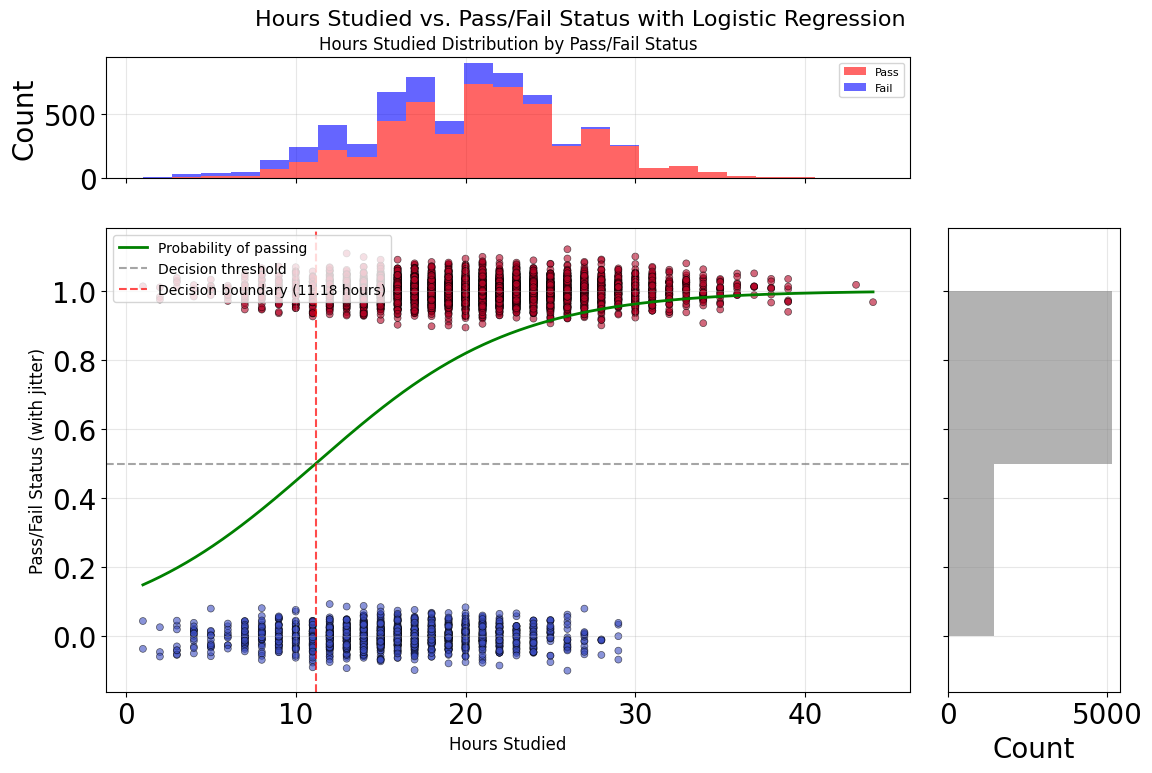

In [591]:
# Create a more detailed visualization with marginal distributions
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create a figure with a grid layout and transparent background
fig = plt.figure(figsize=(12, 8), facecolor='none')
gs = fig.add_gridspec(4, 5)

# Main scatter plot in the middle
ax_main = fig.add_subplot(gs[1:4, 0:4])
ax_main.set_facecolor('none')

# Create a scatter plot with jitter to show density
# Use jitter to see overlapping points better
jitter = np.random.normal(0, 0.03, df['Pass_Fail'].shape)
ax_main.scatter(df['Hours_Studied'], df['Pass_Fail'] + jitter, c=df['Pass_Fail'],
               cmap='coolwarm', alpha=0.6, s=25, edgecolor='k', linewidth=0.5)

# Plot sigmoid curve
ax_main.plot(hours_range, pass_probs, 'g-', linewidth=2, label='Probability of passing')

# Add horizontal line at p=0.5
ax_main.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Decision threshold')

# Add vertical line at decision boundary
ax_main.axvline(x=decision_boundary, color='red', linestyle='--', alpha=0.7,
               label=f'Decision boundary ({decision_boundary:.2f} hours)')

# Customize main plot
ax_main.set_xlabel('Hours Studied', fontsize=12)
ax_main.set_ylabel('Pass/Fail Status (with jitter)', fontsize=12)
ax_main.grid(True, alpha=0.3)
ax_main.legend(loc='upper left', fontsize=10)

# Add histograms on the top for hours distribution with transparent background
ax_top = fig.add_subplot(gs[0, 0:4], sharex=ax_main)
ax_top.set_facecolor('none')

# Plot histograms for pass and fail groups
pass_hours = df[df['Pass_Fail'] == 1]['Hours_Studied']
fail_hours = df[df['Pass_Fail'] == 0]['Hours_Studied']
ax_top.hist([pass_hours, fail_hours], bins=25, stacked=True, color=['red', 'blue'], alpha=0.6,
           label=['Pass', 'Fail'])
ax_top.set_ylabel('Count')
ax_top.set_title('Hours Studied Distribution by Pass/Fail Status', fontsize=12)
ax_top.legend(loc='upper right', fontsize=8)
ax_top.set_axisbelow(True)
ax_top.grid(True, alpha=0.3)

# Add right histogram for pass/fail distribution with transparent background
ax_right = fig.add_subplot(gs[1:4, 4], sharey=ax_main)
ax_right.set_facecolor('none')
ax_right.hist(df['Pass_Fail'], bins=2, orientation='horizontal', color='gray', alpha=0.6)
ax_right.set_xlabel('Count')
ax_right.set_axisbelow(True)
ax_right.grid(True, alpha=0.3)

# Remove ticks from the histograms
ax_top.tick_params(axis='x', labelbottom=False)
ax_right.tick_params(axis='y', labelleft=False)

plt.suptitle('Hours Studied vs. Pass/Fail Status with Logistic Regression', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.92, right=0.95)
# plt.savefig('detailed_logistic_regression.png', transparent=True)
plt.show()

### Comparing Multiple Features for Predicting Pass/Fail

Let's compare how well different features predict whether a student will pass or fail.

Performance of Different Features for Predicting Pass/Fail:
             Feature  Coefficient  Intercept  Accuracy  Decision_Boundary
1         Attendance     0.147703  -9.861696  0.810136          66.767214
2    Previous_Scores     0.023717  -0.498124  0.791982          21.003063
3  Tutoring_Sessions     0.262455   0.884950  0.791982          -3.371821
0      Hours_Studied     0.171033  -1.912376  0.786687          11.181308


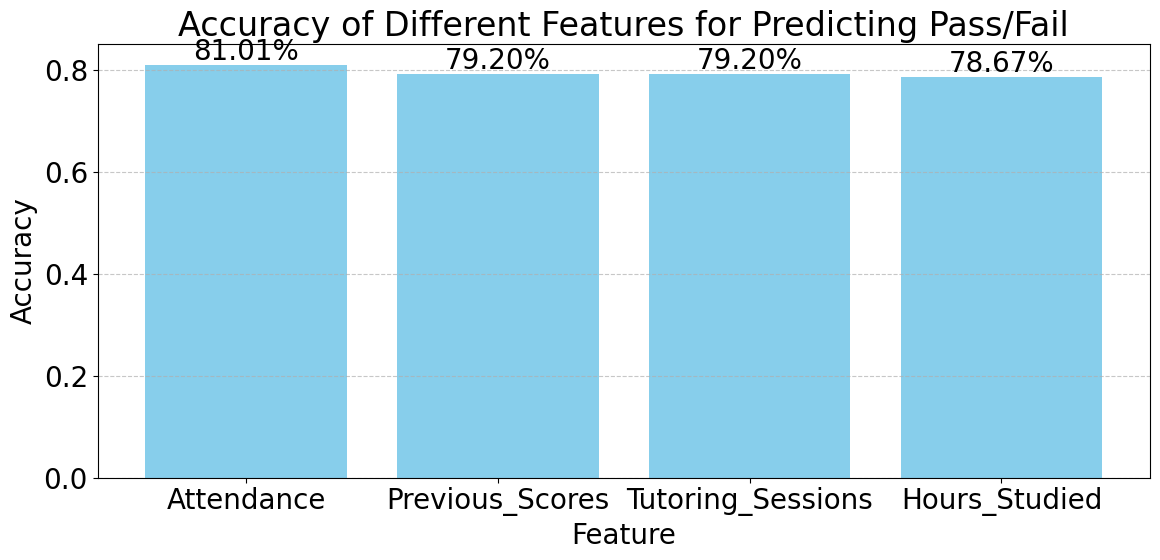

In [592]:
# Compare different features for predicting pass/fail
features_to_try = ['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']
results = []

for feature in features_to_try:
    # Create X and y for logistic regression
    X_feature = df[[feature]]
    y_pass_fail = df['Pass_Fail']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X_feature, y_pass_fail, test_size=0.2, random_state=42
    )
    
    # Fit logistic regression model
    log_reg = LogisticRegression(random_state=42)
    log_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate the decision boundary
    decision_boundary = -log_reg.intercept_[0] / log_reg.coef_[0][0]
    
    # Store results
    results.append({
        'Feature': feature,
        'Coefficient': log_reg.coef_[0][0],
        'Intercept': log_reg.intercept_[0],
        'Accuracy': accuracy,
        'Decision_Boundary': decision_boundary
    })

# Display results
results_df = pd.DataFrame(results).sort_values('Accuracy', ascending=False)
print("Performance of Different Features for Predicting Pass/Fail:")
print(results_df)

# Create visualization to compare features
plt.figure(figsize=(12, 6))
plt.bar(results_df['Feature'], results_df['Accuracy'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Features for Predicting Pass/Fail')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add accuracy values on top of each bar
for i, v in enumerate(results_df['Accuracy']):
    plt.text(i, v + 0.01, f"{v:.2%}", ha='center')

plt.tight_layout()
plt.show()